<h1>연습1) numpy api의 의미를 파악해보자</h1>
<ul>
    <li>array</li>
    <li>arange</li>
    <li>random.shuffle(np_array)</li>
    <li>shape</li>
    <li>column_stack</li>
    <li>row_stack</li>
    <li>ones</li>
    <li>zeros</li>
</ul>

In [3]:
import numpy as np

In [8]:
print(np.array([[1,2],[3,4]])) # array => np array 생성

[[1 2]
 [3 4]]


In [9]:
print(np.arange(3)) # arange => range로 np array 생성

[0 1 2]


In [14]:
arr = np.arange(1,11)
print(arr)
np.random.shuffle(arr) # np.random.shuffle => np array를 shuffle 함
print(arr)

[ 1  2  3  4  5  6  7  8  9 10]
[ 9  1  4  5  6  2  8 10  7  3]


In [16]:
print(arr.shape) #shape => np array의 (샘플 수, 특성 수)를 제공

(10,)


In [23]:
test_col = np.column_stack(([1,2,3],[4,5,6])) # column_stack =>열로 np 배열 생성
test_row = np.row_stack(([1,2,3],[4,5,6])) # row_stack => 행으로 np 배열 생성
print(test_col)
print(test_row)

[[1 4]
 [2 5]
 [3 6]]
[[1 2 3]
 [4 5 6]]


In [25]:
print(np.ones(10)) # ones => 원소가 1인 배열 생성

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [29]:
print(np.zeros(10)) # zeros => 원소가 0인 배열 생성

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<h1>연습2) 주어진 데이터를 훈련 세트와 테스트 세트로 나누자</h1>

In [30]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [38]:
fish_data = np.column_stack((fish_length,fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_data[:3])
print(fish_target[:3])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]]
[1. 1. 1.]


In [39]:
from sklearn.model_selection import train_test_split

In [42]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data,fish_target, stratify=fish_target, random_state=42)

print(train_target)
print(test_target)

[1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


<h1>연습3) startify = fish_target와 random_state=42의 의미는?</h1>

<h1>연습4) 25,150 데이터가 주어졌을 때 최근접 이웃의 거리와 인덱스를 출력하고 그래프에 나타내라</h1>

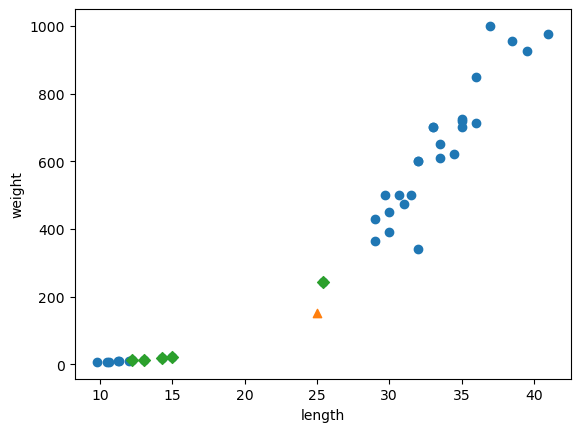

인덱스: [[21 33 19 30  1]]
거리: [[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [51]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

distances, indexes = kn.kneighbors([[25,150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(f'인덱스: {indexes}')
print(f'거리: {distances}')

<h1>연습5) 위에서 출력된 거리의 이상한 점과 x의 표현 범위를 y에 맞게 그래프를 다시 그려라. 그리고 그랬을 때 발생한 문제를 출력해라</h1>

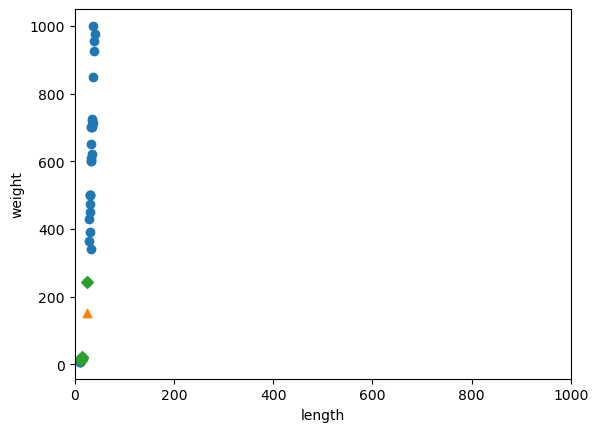

In [52]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

<h1>예제6) 데이터를 브로드캐스팅을 이용해 표준점수로 전처리하고 다시 모델을 훈련 시킨 결과를 그래프로 그래프로나타내라

평균 [ 27.29722222 454.09722222], 표준편차 [  9.98244253 323.29893931]
25cm, 150g는 빙어(1)인가? 도미(0)인가?[1.]


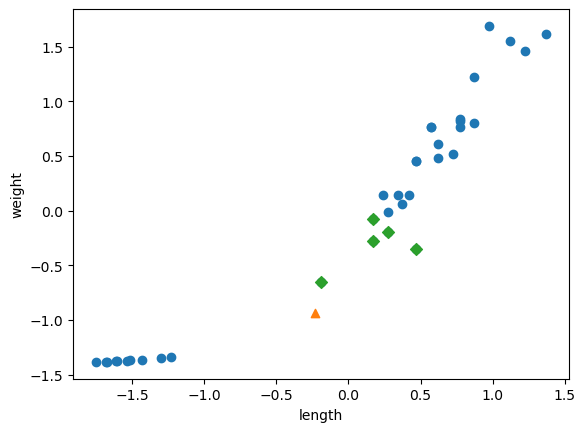

In [63]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input,axis = 0)
print(f'평균 {mean}, 표준편차 {std}')

train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std
new = ([25,150] - mean) / std

kn.fit(train_scaled,train_target)
kn.score(test_scaled,test_target)
print(f'25cm, 150g는 빙어(1)인가? 도미(0)인가?{kn.predict([new])}')

distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

<h1>예제7) axis=0, axis=1의 의미가 뭘까?</h1>

[[1,2]
[3,4]
[5,6]]

이런 데이터를 np.means(arr, axis=0) 하면
[ (1+3+5)/3,(2+4+6)/3] 을 리턴한다.


즉, axis=0이면 행을 따라 작업을 수행하고
axis = 1 이면 열을 따라 작업을 수행한다.